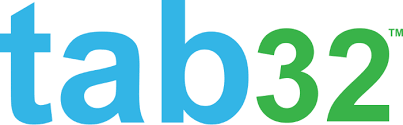

### Aim - To study the properties of 'Production' time series & its forecastability for the next two quarters.

In [1]:
import pandas as pd, tensorflow as tf, plotly.graph_objects as go, plotly.express as px, matplotlib.pyplot as plt
import pandas_datareader,warnings,seaborn as sns,numpy as np,math,datetime as dt,pmdarima,tensorflow as tf,holoviews as hv
from prophet import Prophet

from prophet.plot import plot_plotly
from prophet.forecaster import plot, plot_components
from scipy.stats import boxcox
from scipy import stats
from scipy.signal import find_peaks
from prophet.forecaster import Prophet
sns.set(style="whitegrid", color_codes=True)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read data and set index as data
dataset = pd.read_csv('OneDrive - DENTINE INFORMATICS LLP/Desktop/Ledgers.csv', parse_dates = True)
dataset['ledger_date'] = pd.to_datetime(dataset.ledger_date)
data = dataset[dataset.category == "Production"]
data = data.filter(['ledger_date', 'debit_src'])
data = data.rename(columns={'ledger_date':'ds', 'debit_src':'y'})

## Forecasting

In [3]:
m = Prophet()
m.fit(data)

18:57:50 - cmdstanpy - INFO - Chain [1] start processing
19:00:36 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2206,2024-09-15
2207,2024-09-16
2208,2024-09-17
2209,2024-09-18
2210,2024-09-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2206,2024-09-15,43.441483,-475.168870,587.629207
2207,2024-09-16,120.800375,-402.585880,679.645013
2208,2024-09-17,115.708940,-396.680526,643.230010
2209,2024-09-18,117.041395,-400.252486,720.395342
2210,2024-09-19,116.042174,-433.311346,638.314623


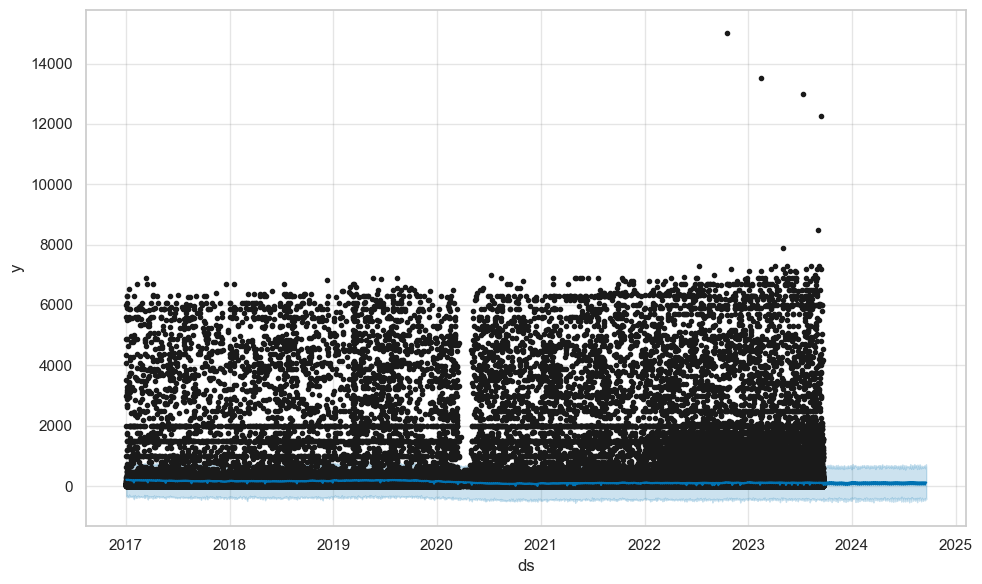

In [6]:
fig1 = m.plot(forecast)

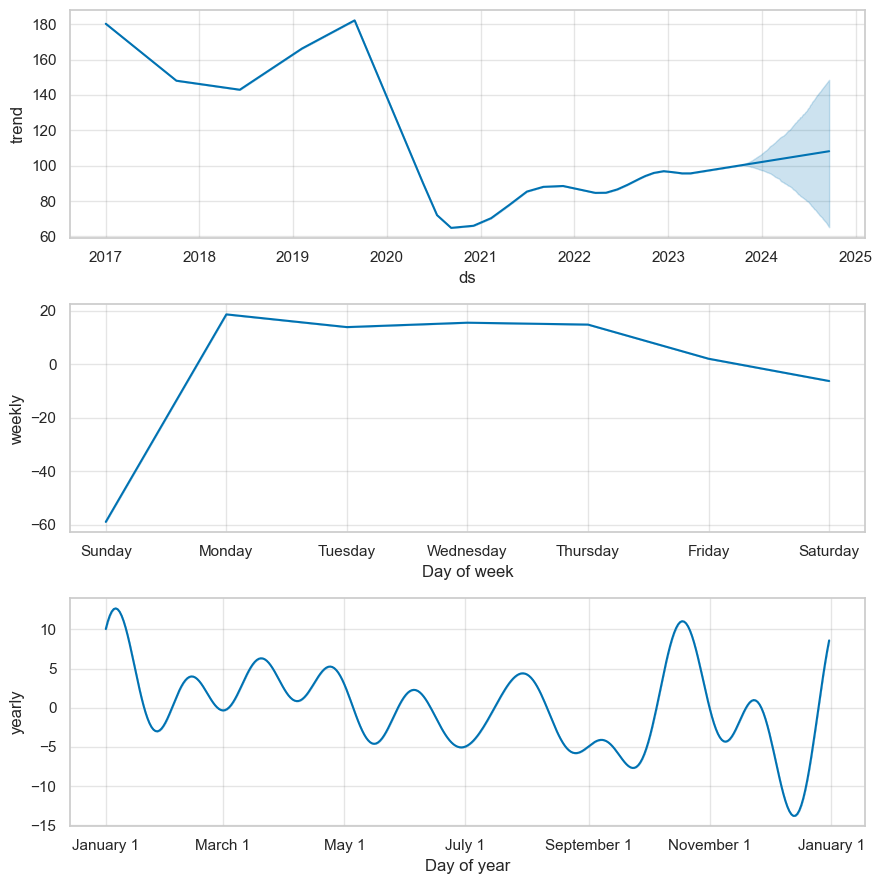

In [7]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

### Normal Split

In [9]:
# train = data[:int(len(data) * 0.8)]
# test = data[int(len(data) * 0.8):]